<a href="https://colab.research.google.com/github/ricardocarreras/Bootcamp_DataScience_student/blob/master/prediccionesTesla1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm

In [2]:
!pip install yfinance

     |████████████████████████████████| 63 kB 1.2 MB/s 
     |████████████████████████████████| 6.4 MB 16.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [81]:
import yfinance as yf

start="2016-01-01"

end="2022-04-01"

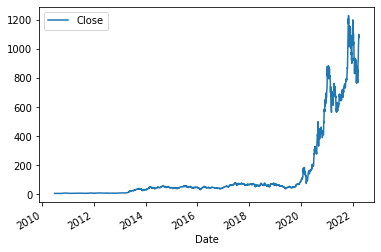

In [85]:
accionesT=yf.Ticker("TSLA")

accionesT_hist=accionesT.history(period="Max")

accionesT_hist.plot.line(y="Close")

In [45]:
accionesT_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


In [112]:
accionesT_hist.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,PM50
Date,,,,,,,,
2022-03-28,1065.099976,1097.880005,1053.599976,1091.839966,34168700,0,0.0,<bound method Rolling.mean of Rolling [window=...
2022-03-29,1107.989990,1114.770020,1073.109985,1099.569946,24538300,0,0.0,<bound method Rolling.mean of Rolling [window=...
2022-03-30,1091.170044,1113.949951,1084.000000,1093.989990,19955000,0,0.0,<bound method Rolling.mean of Rolling [window=...
2022-03-31,1094.569946,1103.140015,1076.640015,1077.599976,16330900,0,0.0,<bound method Rolling.mean of Rolling [window=...
2022-04-01,1081.150024,1094.750000,1066.640015,1084.589966,18012900,0,0.0,<bound method Rolling.mean of Rolling [window=...


In [113]:
accionesT_hist.Close.rolling(50).mean

<bound method Rolling.mean of Rolling [window=50,center=False,axis=0,method=single]>

In [7]:
# vemps que tenemos los datos hasta el día de hoy
# ahora vamos a modificar más adelante los datos para evitar un error común, que consiste en precedir algo usando en el algoritmo ese mismo dato.
# para evitarlo, tenemos que cambiar los datos de forma que usamos los datos anteriores para predecir el día posterior

In [ ]:
# Añadimos ahora los datos de la cotización del barril de petroleo BRENT

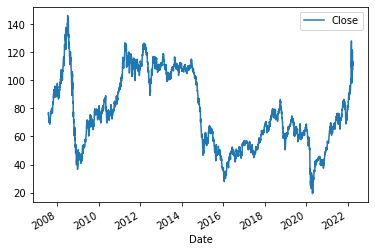

In [47]:
cotizaciones_brent=yf.Ticker("BZ=F")

cotizaciones_brent_hist=cotizaciones_brent.history(period="Max")

cotizaciones_brent_hist.plot.line(y="Close")

In [23]:
cotizaciones_brent_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2007-07-30,75.849998,76.529999,75.440002,75.739998,2575,0,0
2007-07-31,75.699997,77.169998,75.669998,77.050003,3513,0,0
2007-08-01,77.000000,77.059998,74.860001,75.349998,3930,0,0
2007-08-02,75.220001,76.209999,74.269997,75.760002,6180,0,0
2007-08-03,75.389999,76.000000,74.529999,74.750000,4387,0,0


In [ ]:
# Cambiamos el nombre de la columna Close 

In [50]:
cotizaciones_brent_hist=cotizaciones_brent_hist.rename(columns={"Close": "CloseBRENT"})

# ahora añadimos el cierre Brent a los datos de Tesla 



In [51]:
accionesT_hist=accionesT_hist.join(cotizaciones_brent_hist["CloseBRENT"])

In [ ]:
# Importamos ahora los datos de la cotización del barril de petroleo BRENT

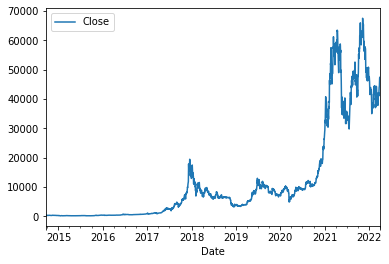

In [52]:
cotizaciones_btc=yf.Ticker("BTC-USD")

cotizaciones_btc_hist=cotizaciones_btc.history(period="Max")

cotizaciones_btc_hist.plot.line(y="Close")

In [53]:
cotizaciones_btc_hist=cotizaciones_btc_hist.rename(columns={"Close": "CloseBTC"})

In [ ]:
# Unimos los datos de la cotización del bitcoin al conjunto de datos

In [54]:
accionesT_hist=accionesT_hist.join(cotizaciones_btc_hist["CloseBTC"])

In [56]:
accionesT_hist.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,CloseBRENT,CloseBTC
Date,,,,,,,,,
2022-03-28,1065.099976,1097.880005,1053.599976,1091.839966,34168700,0,0.0,112.480003,47128.003906
2022-03-29,1107.989990,1114.770020,1073.109985,1099.569946,24538300,0,0.0,110.230003,47465.730469
2022-03-30,1091.170044,1113.949951,1084.000000,1093.989990,19955000,0,0.0,113.449997,47062.664062
2022-03-31,1094.569946,1103.140015,1076.640015,1077.599976,16330900,0,0.0,107.910004,45538.675781
2022-04-01,1081.150024,1094.750000,1066.640015,1084.589966,18012900,0,0.0,107.669998,46281.644531


In [ ]:
# creamos los datos objetivos, que indican si ese día la acción de Tesla ha subido (1) o ha bajado(0)

In [57]:

datosT=accionesT_hist[["Close"]]

In [58]:
datosT=datosT.rename(columns={"Close": "Cierre Real"})

In [59]:
datosT["target"]=accionesT_hist.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]

In [60]:
datosT.head()

,Cierre Real,target
Date,,
2010-06-29,4.778,NaN
2010-06-30,4.766,0.0
2010-07-01,4.392,0.0
2010-07-02,3.840,0.0
2010-07-06,3.222,0.0


In [62]:
datosT.tail()

,Cierre Real,target
Date,,
2022-03-28,1091.839966,1.0
2022-03-29,1099.569946,1.0
2022-03-30,1093.989990,0.0
2022-03-31,1077.599976,0.0
2022-04-01,1084.589966,1.0


In [13]:
 # podemos ver que para el primer día, no hay valor, para el resto dice 1 si sube o 0 si baja ese día respecto al anterior
 

In [ ]:
# vemps que tenemos los datos hasta el día de hoy
# ahora vamos a modificar los datos para evitar un error común, que consiste en precedir algo usando en el algoritmo ese mismo dato.
# para evitarlo, usamos los datos anteriores para predecir el día posterior

In [65]:
acciones_previas=accionesT_hist.copy()

acciones_previas=acciones_previas.shift(1)

acciones_previas.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,CloseBRENT,CloseBTC
Date,,,,,,,,,
2010-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-30,3.800,5.000,3.508,4.778,93831500.0,0.0,0.0,75.440002,NaN
2010-07-01,5.158,6.084,4.660,4.766,85935500.0,0.0,0.0,75.010002,NaN
2010-07-02,5.000,5.184,4.054,4.392,41094000.0,0.0,0.0,72.339996,NaN
2010-07-06,4.600,4.620,3.742,3.840,25699000.0,0.0,0.0,71.650002,NaN


In [15]:
# ahora creamos los predictores y unimos los dos conjuntos de datos, de forma que podamos precedir el comportamiento de una fecha con datos de fechas anteriores

In [63]:
predictores=["Close", "Open", "High", "Low", "Volume", "CloseBRENT", "CloseBTC"]

In [66]:
datos_totales=datosT.join(acciones_previas[predictores]).iloc[1:]

In [67]:
datos_totales.head()

,Cierre Real,target,Close,Open,High,Low,Volume,CloseBRENT,CloseBTC
Date,,,,,,,,,
2010-06-30,4.766,0.0,4.778,3.800,5.000,3.508,93831500.0,75.440002,NaN
2010-07-01,4.392,0.0,4.766,5.158,6.084,4.660,85935500.0,75.010002,NaN
2010-07-02,3.840,0.0,4.392,5.000,5.184,4.054,41094000.0,72.339996,NaN
2010-07-06,3.222,0.0,3.840,4.600,4.620,3.742,25699000.0,71.650002,NaN
2010-07-07,3.160,0.0,3.222,4.000,4.000,3.166,34334500.0,71.449997,NaN


In [68]:
datos_totales.tail()

,Cierre Real,target,Close,Open,High,Low,Volume,CloseBRENT,CloseBTC
Date,,,,,,,,,
2022-03-28,1091.839966,1.0,1010.640015,1008.000000,1021.799988,997.320007,20677200.0,120.650002,44348.730469
2022-03-29,1099.569946,1.0,1091.839966,1065.099976,1097.880005,1053.599976,34168700.0,112.480003,47128.003906
2022-03-30,1093.989990,0.0,1099.569946,1107.989990,1114.770020,1073.109985,24538300.0,110.230003,47465.730469
2022-03-31,1077.599976,0.0,1093.989990,1091.170044,1113.949951,1084.000000,19955000.0,113.449997,47062.664062
2022-04-01,1084.589966,1.0,1077.599976,1094.569946,1103.140015,1076.640015,16330900.0,107.910004,45538.675781


In [ ]:
# analicemos estos datos

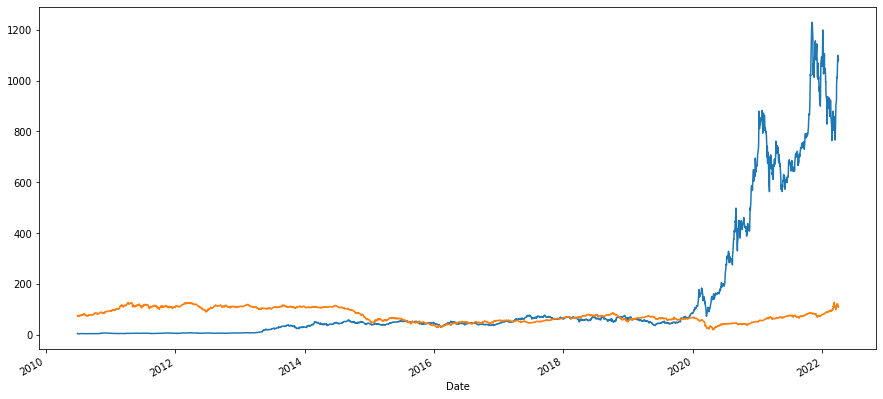

In [88]:
datos_totales["Cierre Real"].plot(label="Cierre real", figsize=(15,7))
datos_totales["CloseBRENT"].plot(label="Cierre BRENT")

In [ ]:


datos_totales.describe()

,Cierre Real,target,Close,Open,High,Low,Volume,CloseBRENT,CloseBTC
count,2961.000000,2961.000000,2961.000000,2961.000000,2961.000000,2961.000000,2.961000e+03,2923.000000,1899.000000
mean,140.707351,0.518068,140.342672,140.269606,143.373319,136.982028,3.130070e+07,76.252138,11780.773361
std,253.436141,0.499758,252.853717,252.768970,258.601425,246.493667,2.796332e+07,26.307647,16423.020003
min,3.160000,0.000000,3.160000,3.228000,3.326000,2.996000,5.925000e+05,19.330000,178.102997
25%,20.010000,0.000000,19.910000,19.785999,20.504000,19.340000,1.311450e+07,54.889999,609.234009
50%,46.619999,1.000000,46.605999,46.759998,47.500000,45.838001,2.487450e+07,70.519997,6398.540039
75%,68.220001,1.000000,68.211998,68.185997,69.431999,66.959999,3.971550e+07,105.834999,10761.649414
max,1229.910034,1.000000,1229.910034,1234.410034,1243.489990,1217.000000,3.046940e+08,127.980003,67566.828125


In [70]:
datos_totales.corr()

,Cierre Real,target,Close,Open,High,Low,Volume,CloseBRENT,CloseBTC
Cierre Real,1.000000,0.031965,0.999010,0.998317,0.998697,0.998750,0.087757,-0.136505,0.928404
target,0.031965,1.000000,0.016717,0.017273,0.017081,0.017216,0.010843,-0.011272,0.020088
Close,0.999010,0.016717,1.000000,0.999261,0.999672,0.999674,0.087729,-0.136250,0.929093
Open,0.998317,0.017273,0.999261,1.000000,0.999731,0.999624,0.086872,-0.136308,0.929016
High,0.998697,0.017081,0.999672,0.999731,1.000000,0.999599,0.090744,-0.135995,0.928552
Low,0.998750,0.017216,0.999674,0.999624,0.999599,1.000000,0.083032,-0.136189,0.929812
Volume,0.087757,0.010843,0.087729,0.086872,0.090744,0.083032,1.000000,-0.293765,-0.049446
CloseBRENT,-0.136505,-0.011272,-0.136250,-0.136308,-0.135995,-0.136189,-0.293765,1.000000,0.464280
CloseBTC,0.928404,0.020088,0.929093,0.929016,0.928552,0.929812,-0.049446,0.464280,1.000000


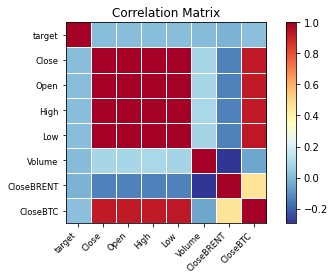

In [75]:
correlaciones = datos_totales.set_index('Cierre Real').corr()
sm.graphics.plot_corr(correlaciones, xnames=list(correlaciones.columns))
plt.show()


In [103]:
datos_totales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2961 entries, 2010-06-30 to 2022-04-01
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cierre Real  2961 non-null   float64
 1   target       2961 non-null   float64
 2   Close        2961 non-null   float64
 3   Open         2961 non-null   float64
 4   High         2961 non-null   float64
 5   Low          2961 non-null   float64
 6   Volume       2961 non-null   float64
 7   CloseBRENT   2923 non-null   float64
 8   CloseBTC     1899 non-null   float64
 9   PM50         2961 non-null   object 
 10  PM200        2961 non-null   object 
dtypes: float64(9), object(2)
memory usage: 277.6+ KB


In [100]:
# veamos ahora promedios móviles (PM) a 50 y 200 días 

datos_totales["PM50"]=datos_totales.Close.rolling(50).mean
datos_totales["PM200"]=datos_totales.Close.rolling(200).mean

datos_totales["PM50"].head()

Date
2010-06-30    <bound method Rolling.mean of Rolling [window=...
2010-07-01    <bound method Rolling.mean of Rolling [window=...
2010-07-02    <bound method Rolling.mean of Rolling [window=...
2010-07-06    <bound method Rolling.mean of Rolling [window=...
2010-07-07    <bound method Rolling.mean of Rolling [window=...
Name: PM50, dtype: object

TypeError: ignored

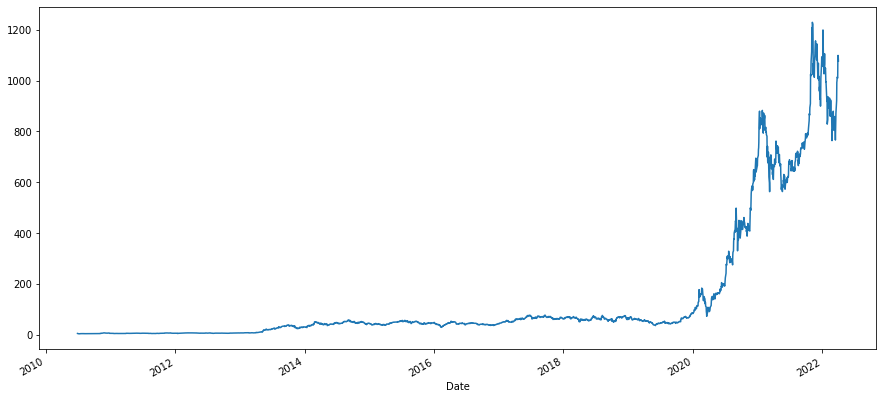

In [94]:
datos_totales["Close"].plot(label="Close", figsize=(15,7))
datos_totales["PM50"].plot()
datos_totales["PM200"].plot()